#Importing packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, ttest_ind, kstest


In [20]:
# import dataset
df = pd.read_csv('all.csv')
cwe = pd.read_csv('cwe.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,source_db,source_db_id,cna,cvss3_bscore,cvss3_severity,cvss3_impact,cvss3_exploitability,cvss3_attack,cvss3_complexity,cvss3_priveleges,cvss3_user_interaction,cvss3_scope,cvss3_confidentiality,cvss3_integrity,cvss3_availability,cvss2_bscore,cvss2_severity,cvss2_impact,cvss2_exploitability,cvss2_access,cvss2_complexity,cvss2_authentication,cvss2_confidentiality,cvss2_integrity,cvss2_availability,cwe,capec,cpe,description,n_exploits,technique_id,tactic,date_published,date_modified,history_summary,date_exploit,0day_low_x,0day_high,today_low,today_high,exp_type,platform,exp_verified,vendor,product,sector,incident,EOS_product,EOS_version,EOS_date,Type,0day,Today,0day_low_y,0day_upper,Today_low,Today_upper
0,0,0,nvd.nist.gov,CVE-2017-16861,Atlassian,9.8,CRITICAL,5.9,3.9,Network,Low,None,None,Unchanged,High,High,High,7.5,HIGH,6.4,10.0,Network,Low,None,Partial,Partial,Partial,284,"19, 441, 478, 479, 502, 503, 536, 546, 550, 55...","cpe:2.3:a:atlassian:fisheye, cpe:2.3:a:atlassi...",It was possible for double OGNL evaluation in ...,0,"1156, 1058, 1130, 1050, 1160, 1152, 1031, 1062...","Persistence , Privilege Escalation , Defense E...",1/31/2018,3/1/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atlassian,"Fisheye,Crucible",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,nvd.nist.gov,CVE-2017-1000409,MITRE Corporation,7.0,HIGH,5.9,1.0,Local,High,Low,None,Unchanged,High,High,High,6.9,MEDIUM,10.0,3.4,Local,Medium,None,Complete,Complete,Complete,119,"10, 100, 123, 14, 24, 42, 44, 45, 46, 47, 8, 9",cpe:2.3:a:gnu:glibc:2.5,A buffer overflow in glibc 2.5 (released on Se...,1,NaN,NaN,1/31/2018,4/4/2019,NaN,12/13/2017,0,1000.0,0.0,1000.0,local,Linux,True,GNU,Glibc,NaN,NaN,NaN,NaN,NaN,Software Library,$0-$1k,$0-$1k,0.0,1000.0,0.0,1000.0
2,2,2,nvd.nist.gov,CVE-2017-1000408,MITRE Corporation,7.8,HIGH,5.9,1.8,Local,Low,Low,None,Unchanged,High,High,High,7.2,HIGH,10.0,3.9,Local,Insufficient_Info,None,Complete,Complete,Complete,399,NaN,cpe:2.3:a:gnu:glibc:2.1.1,A memory leak in glibc 2.1.1 (released on May ...,1,NaN,NaN,1/31/2018,4/4/2019,NaN,12/13/2017,0,1000.0,0.0,1000.0,local,Linux,True,GNU,Glibc,NaN,NaN,NaN,NaN,NaN,Software Library,$0-$1k,$0-$1k,0.0,1000.0,0.0,1000.0
3,3,3,nvd.nist.gov,CVE-2017-16914,Flexera Software LLC,5.9,MEDIUM,3.6,2.2,Network,High,None,None,Unchanged,None,None,None,7.1,HIGH,6.9,8.6,Network,Medium,None,None,None,Complete,476,NaN,"cpe:2.3:o:linux:linux_kernel, cpe:2.3:o:linux:...","The ""stub_send_ret_submit()"" function (drivers...",0,NaN,NaN,1/31/2018,8/24/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,Linux Kernel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,nvd.nist.gov,CVE-2017-16913,Flexera Software LLC,5.9,MEDIUM,3.6,2.2,Network,High,None,None,Unchanged,None,None,None,7.1,HIGH,6.9,8.6,Network,Medium,None,None,None,Complete,119,"10, 100, 123, 14, 24, 42, 44, 45, 46, 47, 8, 9","cpe:2.3:o:linux:linux_kernel, cpe:2.3:o:linux:...","The ""stub_recv_cmd_submit()"" function (drivers...",0,NaN,NaN,1/31/2018,8/24/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,Linux Kernel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27466,27466,27466,nvd.nist.gov,CVE-2018-20877,MITRE Corporation,5.4,MEDIUM,2.7,2.3,Network,Low,Low,Required,Changed,Low,Low,Low,3.5,LOW,2.9,6.8,Network,Medium,Single,None,Partial,None,79,"209, 588, 591, 592, 63, 85",cpe:2.3:a:cpanel:cpanel,cPanel before 74.0.8 allows self XSS in WHM St...,0,NaN,NaN,8/1/2019,8/1/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpanel,Cpanel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27467,27467,27467,nvd.nist.gov,CVE-2018-20876,MITRE Corporation,5.4,MEDIUM,2.7,2.3,Network,Low,Low,Required,Changed,Low,Low,Low,3.5,LOW,2.9,6.8,Network,Medium,Single,None,Partial,None,79,"209, 588, 591, 592, 63, 85",cpe:2.3:a:cpanel:cpanel,cPanel b

In [21]:
# drop Nan value in products 
df1 = df['product'].isna().sum()
df[df['product'].isna()].dropna(inplace=True)
df[df['product'].isna()].size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


257417

# 1. Create four(4) additional charts of your choice showing the highest (e.g. top 20) results on a given feature. To do this you need to decide the appropriate chart/visualisation type.

In [22]:
indexes = list()
new_values = list()
df = df.dropna(subset=['product'])
for i, presplit in enumerate(df['product'].astype(str)):
    values = presplit.split(',')
    if False and len(values) > 1:
        indexes.append(i)
        new_values.append(presplit)
    for value in values:
        indexes.append(i)
        new_values.append(value)
new_df = df.iloc[indexes, :].copy()
new_df['product'] = new_values
new_df['product'] = new_df['product'].str.strip()

In [23]:
distros = ['Debian Linux', 'Ubuntu Linux', 'Windows 10', 'Enterprise Linux Workstation',
          'Enterprise Linux Desktop', 'Windows 7', 'Windows 8.1', 'Fedora', 'Mac Os X']
pdata_os =new_df[new_df['product'].isin(distros)]

In [24]:
pdata_os

,Unnamed: 0,id,source_db,source_db_id,cna,cvss3_bscore,cvss3_severity,cvss3_impact,cvss3_exploitability,cvss3_attack,cvss3_complexity,cvss3_priveleges,cvss3_user_interaction,cvss3_scope,cvss3_confidentiality,cvss3_integrity,cvss3_availability,cvss2_bscore,cvss2_severity,cvss2_impact,cvss2_exploitability,cvss2_access,cvss2_complexity,cvss2_authentication,cvss2_confidentiality,cvss2_integrity,cvss2_availability,cwe,capec,cpe,description,n_exploits,technique_id,tactic,date_published,date_modified,history_summary,date_exploit,0day_low_x,0day_high,today_low,today_high,exp_type,platform,exp_verified,vendor,product,sector,incident,EOS_product,EOS_version,EOS_date,Type,0day,Today,0day_low_y,0day_upper,Today_low,Today_upper
27,27,27,nvd.nist.gov,CVE-2018-5996,MITRE Corporation,7.8,HIGH,5.9,1.8,Local,Low,None,Required,Unchanged,High,High,High,6.8,MEDIUM,6.4,8.6,Network,Medium,None,Partial,Partial,Partial,388,NaN,"cpe:2.3:a:7-zip:7-zip, cpe:2.3:a:7-zip:p7zip, ...",Insufficient exception handling in the method ...,1,NaN,NaN,1/31/2018,5/19/2018,NaN,7/23/2018,NaN,NaN,NaN,NaN,webapps,Hardware,True,"7-zip , Debian",Debian Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,36,36,nvd.nist.gov,CVE-2018-1000001,MITRE Corporation,7.8,HIGH,5.9,1.8,Local,Low,Low,None,Unchanged,High,High,High,7.2,HIGH,10.0,3.9,Local,Low,None,Complete,Complete,Complete,119,"10, 100, 123, 14, 24, 42, 44, 45, 46, 47, 8, 9","cpe:2.3:a:gnu:glibc, cpe:2.3:o:canonical:ubunt...",In glibc 2.26 and earlier there is confusion i...,1,NaN,NaN,1/31/2018,4/4/2019,NaN,6/13/2018,1000,2000.0,0.0,1000.0,local,Linux,True,"GNU , Canonical , Redhat",Enterprise Linux Workstation,NaN,NaN,NaN,NaN,NaN,Software Library,$1k-$2k,$0-$1k,1000.0,2000.0,0.0,1000.0
36,36,36,nvd.nist.gov,CVE-2018-1000001,MITRE Corporation,7.8,HIGH,5.9,1.8,Local,Low,Low,None,Unchanged,High,High,High,7.2,HIGH,10.0,3.9,Local,Low,None,Complete,Complete,Complete,119,"10, 100, 123, 14, 24, 42, 44, 45, 46, 47, 8, 9","cpe:2.3:a:gnu:glibc, cpe:2.3:o:canonical:ubunt...",In glibc 2.26 and earlier there is confusion i...,1,NaN,NaN,1/31/2018,4/4/2019,NaN,6/13/2018,1000,2000.0,0.0,1000.0,local,Linux,True,"GNU , Canonical , Redhat",Ubuntu Linux,NaN,NaN,NaN,NaN,NaN,Software Library,$1k-$2k,$0-$1k,1000.0,2000.0,0.0,1000.0
36,36,36,nvd.nist.gov,CVE-2018-1000001,MITRE Corporation,7.8,HIGH,5.9,1.8,Local,Low,Low,None,Unchanged,High,High,High,7.2,HIGH,10.0,3.9,Local,Low,None,Complete,Complete,Complete,119,"10, 100, 123, 14, 24, 42, 44, 45, 46, 47, 8, 9","cpe:2.3:a:gnu:glibc, cpe:2.3:o:canonical:ubunt...",In glibc 2.26 and earlier there is confusion i...,1,NaN,NaN,1/31/2018,4/4/2019,NaN,6/13/2018,1000,2000.0,0.0,1000.0,local,Linux,True,"GNU , Canonical , Redhat",Enterprise Linux Desktop,NaN,NaN,NaN,NaN,NaN,Software Library,$1k-$2k,$0-$1k,1000.0,2000.0,0.0,1000.0
39,39,39,nvd.nist.gov,CVE-2017-15698,Apache Software Foundation,5.9,MEDIUM,3.6,2.2,Network,High,None,None,Unchanged,None,None,High,4.3,MEDIUM,2.9,8.6,Network,Medium,None,None,Partial,None,295,459,"cpe:2.3:a:apache:tomcat_native, cpe:2.3:a:apac...",When parsing the AIA-Extension field of a clie...,0,1130,Defense Evasion,1/31/2018,3/25/2019,NaN,NaN,10000,25000.0,5000.0,10000.0,NaN,NaN,NaN,"Apache , Debian",Debian Linux,NaN,NaN,NaN,NaN,NaN,Application Server Software,$10k-$25k,$5k-$10k,10000.0,25000.0,5000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27293,27293,27293,nvd.nist.gov,CVE-2019-10168,"Red Hat, Inc.",7.8,HIGH,5.9,1.8,Local,Low,Low,None,Unchanged,High,High,High,4.6,MEDIUM,6.4,3.9,Local,Low,None,Partial,Partial,Partial,284,"19, 441, 478, 479, 502, 503, 536, 546, 550, 55...","cpe:2.3:a:redhat:libvirt, cpe:2.3:a:redhat:lib...",The virConnectBaselineHypervisorCPU() and virC...,0,"1156, 1058, 1130, 1050, 1160, 1152, 1031, 1062...","Persistence , Privilege Escalation , Defen

In [25]:
top20_cwe = pdata_os.cwe.groupby(pdata_os.cwe).count().sort_values(ascending=False).head(20)
top20_cwe=top20_cwe.to_frame()
top20_cwe.columns=['c']
top20_cwe.reset_index(level=0, inplace=True)
top20_cwe.columns=['cwe','c']

Text(0, 0.5, 'CWE')

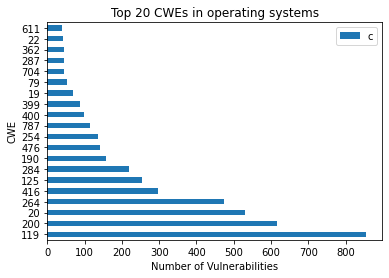

In [26]:
ax = top20_cwe.plot.barh(x='cwe', y='c', title='Top 20 CWEs in operating systems')
ax.set_xlabel('Number of Vulnerabilities')
ax.set_ylabel('CWE')

In [27]:
def get_name_by_cwe(cweid):
    try:
        return cwe.Name[cwe['CWE-ID']==int(cweid)].iloc[0]
    except:
        return cweid
    
def wrap(s, n=40):
    """
    A simple text wrapping function. If a string has length >40 (default), 
    it is split to two lines with a break inserted around the middle
    
    """
    ss=s
    if len(s)>n:
        i=int(len(s)/2)
        l=(s.find(' ',i))
        ss=s[:l]+'<br>'+ss[l+1:]
    return ss    

In [28]:
top20_cwe['Name']=top20_cwe['cwe'].map(get_name_by_cwe).map(wrap)
x = top20_cwe.groupby('Name')['c'].mean().sort_values().head(20)

In [29]:
# top20_cwe

Text(0.5, 1.0, 'Top 20 CWE in operating systems by name')

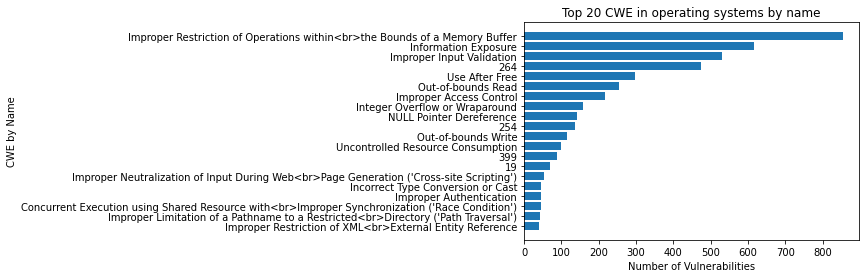

In [30]:
# ax = top20_cwe.plot.barh(x='cwe', y='c', title='Top 20 CWEs in operating systems')
# ax.set_xlabel('Number of Vulnerabilities')
# ax.set_ylabel('CWE')
plt.barh(y=x.index.values, width=x.values);
plt.xlabel('Number of Vulnerabilities')
plt.ylabel('CWE by Name')
plt.title('Top 20 CWE in operating systems by name')

Text(0.5, 1.0, 'Number of unique weaknesses in operating systems')

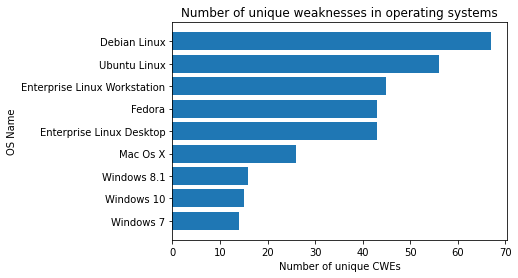

In [31]:
y = pdata_os.groupby('product')['cwe'].nunique().sort_values()
plt.barh(y=y.index.values, width=y.values);
plt.xlabel('Number of unique CWEs')
plt.ylabel('OS Name')
plt.title('Number of unique weaknesses in operating systems')

Text(0.5, 1.0, 'Engineering Diciplines')

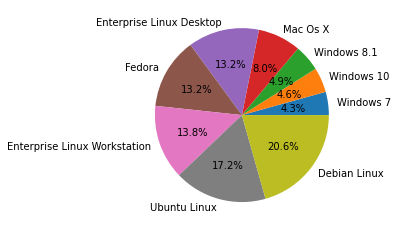

In [32]:
y = pdata_os.groupby('product')['cwe'].nunique().sort_values()
# y.index.values
# y['product']
plt.pie(y, labels=y.index.values, autopct="%1.1f%%")
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')

# 2. Develop and test two (2) additional hypothesis through the appropriate statistical hypothesis testing approach. 

## Comparisons of base score metrics

In [33]:
p = spearmanr(df.cvss2_bscore, df.cvss3_bscore).correlation

In [34]:
print("Spearman correlation between CVSS2 and CVSS3 are equal", p)

Spearman correlation between CVSS2 and CVSS3 are equal 0.7736281373964744




FINDING

Pearson correlation between CVSS2 and CVSS3 are not highly correlated. Moreover the mean of v3 is higher than that of v2:


In [35]:
df[['cvss2_bscore','cvss3_bscore']].describe()

,cvss2_bscore,cvss3_bscore
count,23108.000000,23108.000000
mean,5.762658,7.322962
std,1.896923,1.614950
min,1.200000,1.800000
25%,4.300000,6.100000
50%,5.000000,7.500000
75%,7.200000,8.800000
max,10.000000,10.000000


In [36]:
spearmanr(df.cvss2_access, df.cvss2_complexity)[0]

0.19410756635314552


FINDING

Spearman correlation between cvss2 access and complexity is equal 0.194, so it's very poor correlation.
